In [20]:
import numpy as np
import os
import struct
import matplotlib.pyplot as plt

In [21]:
def read_idx(filename):
    """
    Reads an IDX file and returns its content as a numpy array.
    Handles both image and label files.
    """
    print(f"Reading IDX file: {filename}")
    with open(filename, 'rb') as f:
        # Read the magic number and dimensions from the header
        # The '>IIII' format string reads 4 big-endian unsigned integers
        magic = struct.unpack('>I', f.read(4))[0]
        
        # Determine if it's an image or label file from magic number
        if (magic & 0xFFFF) == 0x803: # Image file
            num_dims = magic & 0xFF
            dims = [struct.unpack('>I', f.read(4))[0] for _ in range(num_dims)]
            print(f"Detected Image file with dimensions: {dims}")
        elif (magic & 0xFFFF) == 0x801: # Label file
            num_items = struct.unpack('>I', f.read(4))[0]
            dims = [num_items]
            print(f"Detected Label file with {num_items} labels.")
        else:
            raise ValueError(f"Unknown magic number {magic} in file {filename}")
        
        # Read the data payload
        data = np.frombuffer(f.read(), dtype=np.uint8)
        data = data.reshape(dims)
        
        return data

def save_as_pgm(image_data, label, index, output_dir):
    """
    Saves a single numpy array image as a PGM file.
    The PGM format is text-based and easy to parse in C.
    """
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
        
    # PGM file format:
    # 1. Magic number "P2" for text-based grayscale
    # 2. Width and Height
    # 3. Maximum pixel value
    # 4. Pixel data
    
    height, width = image_data.shape
    filename = os.path.join(output_dir, f"mnist_img_{index}_label_{label}.pgm")
    
    with open(filename, 'w') as f:
        # Write header
        f.write("P2\n")
        f.write(f"{width} {height}\n")
        f.write("255\n") # Max pixel value for uint8
        
        # Write pixel data
        # Flatten the 2D array to a 1D list of strings
        pixel_values = ' '.join(map(str, image_data.flatten()))
        f.write(pixel_values + '\n')

def plot_first_images(images, labels, num_to_plot=10):
    """
    Uses Matplotlib to plot the first few images from the dataset.
    """
    print(f"\nDisplaying the first {num_to_plot} images...")
    # Create a figure with a 2x5 grid of subplots
    fig, axes = plt.subplots(2, 5, figsize=(10, 5))
    axes = axes.flatten() # Flatten the 2x5 grid into a 1D array of 10
    
    for i in range(num_to_plot):
        if i < len(images):
            ax = axes[i]
            # Display image in grayscale
            ax.imshow(images[i], cmap='gray')
            # Set the title to the corresponding label
            ax.set_title(f"Label: {labels[i]}")
            # Hide the axes ticks and labels for a cleaner look
            ax.set_xticks([])
            ax.set_yticks([])
            
    # Adjust layout to prevent titles from overlapping
    plt.tight_layout()
    # Show the plot
    plt.show()

def main():
    # --- Configuration ---
    # NOTE: Download these files from the official MNIST website
    # and place them in the same directory as this script.
    image_file = 'train-images.idx3-ubyte'
    label_file = 'train-labels.idx1-ubyte'
    output_dir = 'mnist_pgm_images'
    num_images_to_convert = 100 # Set to a smaller number for testing
    
    # Check if source files exist
    if not os.path.exists(image_file) or not os.path.exists(label_file):
        print("Error: MNIST data files not found!")
        print(f"Please download '{image_file}' and '{label_file}'")
        print("from http://yann.lecun.com/exdb/mnist/ and place them here.")
        return
        
    # --- Read Data ---
    images = read_idx(image_file)
    labels = read_idx(label_file)
    
    if images.shape[0] != labels.shape[0]:
        raise ValueError("Number of images and labels do not match!")
        
    num_total_images = images.shape[0]
    print(f"\nFound {num_total_images} total images.")

    # --- NEW: Plot the first 10 images for verification ---
    plot_first_images(images, labels, num_to_plot=10)
    
    # --- Convert and Save ---
    count = min(num_images_to_convert, num_total_images)
    print(f"\nConverting and saving the first {count} images to '{output_dir}'...")
    
    for i in range(count):
        save_as_pgm(images[i], labels[i], i, output_dir)
        if (i + 1) % 10 == 0:
            print(f"  ...converted {i+1}/{count} images")
            
    print("\nConversion complete.")
    print(f"Images are saved in the '{output_dir}' directory.")

Reading IDX file: train-images.idx3-ubyte
Detected Image file with dimensions: [60000, 28, 28]
Reading IDX file: train-labels.idx1-ubyte
Detected Label file with 60000 labels.

Found 60000 total images.

Displaying the first 10 images...


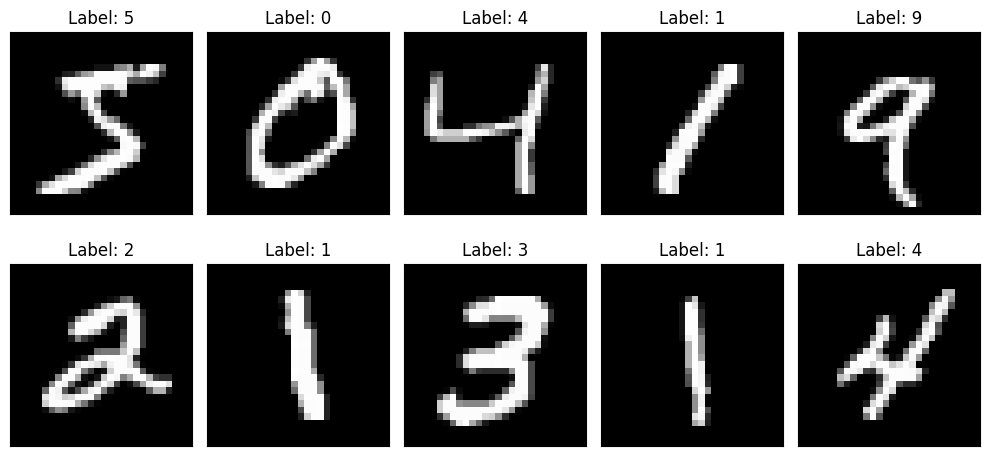


Converting and saving the first 100 images to 'mnist_pgm_images'...
  ...converted 10/100 images
  ...converted 20/100 images
  ...converted 30/100 images
  ...converted 40/100 images
  ...converted 50/100 images
  ...converted 60/100 images
  ...converted 70/100 images
  ...converted 80/100 images
  ...converted 90/100 images
  ...converted 100/100 images

Conversion complete.
Images are saved in the 'mnist_pgm_images' directory.


In [22]:
if __name__ == '__main__':
    main()